**Import all the Libraries and data**

In [0]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=UserWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)
%matplotlib inline

In [0]:
titanic_train = pd.read_csv('https://raw.githubusercontent.com/Deepak1998Mittal/titanic/master/train.csv')
titanic_test  = pd.read_csv('https://raw.githubusercontent.com/Deepak1998Mittal/titanic/master/test.csv')
P_ID = titanic_test['PassengerId']

In [139]:
titanic_train.shape,titanic_test.shape

((891, 12), (418, 11))

In [140]:
titanic_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [141]:
titanic_test.head(2)                                  

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [142]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [143]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [144]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [145]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Missing value(s) imputation

In [146]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
titanic_train['cabin_end'] = np.where(titanic_train['Cabin'].notnull(),1,0)

In [148]:
titanic_train['cabin_end'].head()

0    0
1    1
2    0
3    1
4    0
Name: cabin_end, dtype: int64

In [149]:
titanic_train[titanic_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_end
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1


In [150]:
titanic_test[titanic_test['Embarked'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


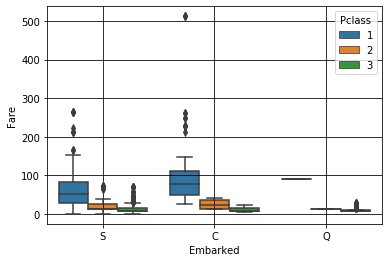

In [151]:
sns.boxplot(x='Embarked',y='Fare',hue='Pclass',data=titanic_train)
plt.grid(color='black')

The following conclusion can be drawn:
* According to the missing Embarked both are of Pclass = 1
* According to boxplot, the median fare of Pclass = 1 is around 80$ for board C
* The missing Embarked should be fill with the board C 

In [0]:
titanic_train['Embarked']=titanic_train['Embarked'].fillna('C')

In [153]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
cabin_end        0
dtype: int64

In [154]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [155]:
titanic_test[titanic_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [0]:
fare = titanic_test[(titanic_test['Pclass']==3)&(titanic_test['Embarked']=='S')]['Fare'].median()

In [0]:
titanic_test['Fare']=titanic_test['Fare'].fillna(fare)

In [158]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

## Features
All the assigned cabin codes contains the floor code with first character

In [159]:
titanic_train['Cabin'][titanic_train['Cabin'].notnull()].head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [0]:
titanic_train['Floor'] = titanic_train['Cabin'].str[0]
titanic_test['Floor']  = titanic_train['Cabin'].str[0]

In [161]:
titanic_train['Floor'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [162]:
titanic_test['Floor'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

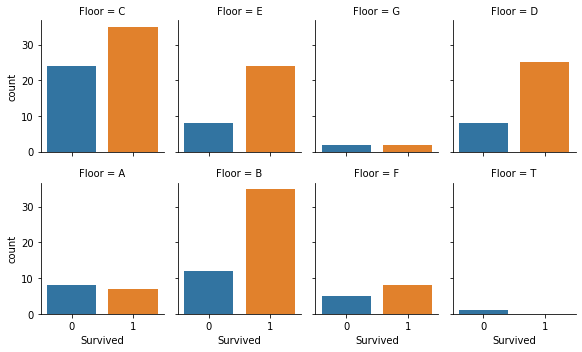

In [163]:
g = sns.catplot("Survived", col="Floor", col_wrap=4,
                    data=titanic_train[titanic_train.Floor.notnull()],
                    kind="count", height=2.5, aspect=.8)

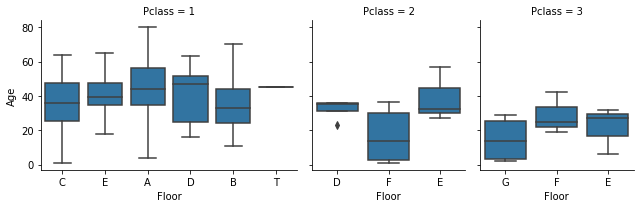

In [164]:
g = sns.FacetGrid(titanic_train, col="Pclass", sharex=False,
                  gridspec_kws={"width_ratios": [5, 3, 3]})
g = g.map(sns.boxplot, "Floor", "Age")

In [165]:
titanic_train['Floor'].fillna('Z',inplace=True)
titanic_test['Floor'].fillna('Z',inplace=True)
titanic_train['Floor'].unique()

array(['Z', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

**Sex as a feature**

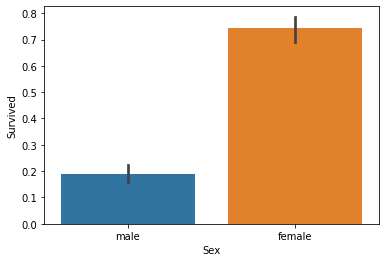

In [166]:
g = sns.barplot(x='Sex',y='Survived',data=titanic_train)

In [167]:
print('Male Survived   : ',round(titanic_train['Survived'][titanic_train['Sex']=='male'].value_counts(normalize=True),2)[1]*100,'%')
print('Female Survived : ',round(titanic_train['Survived'][titanic_train['Sex']=='female'].value_counts(normalize=True),2)[1]*100,'%')

Male Survived   :  19.0 %
Female Survived :  74.0 %


**Family as a feature**

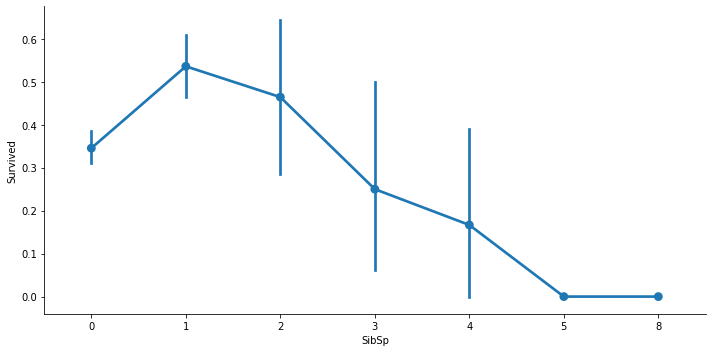

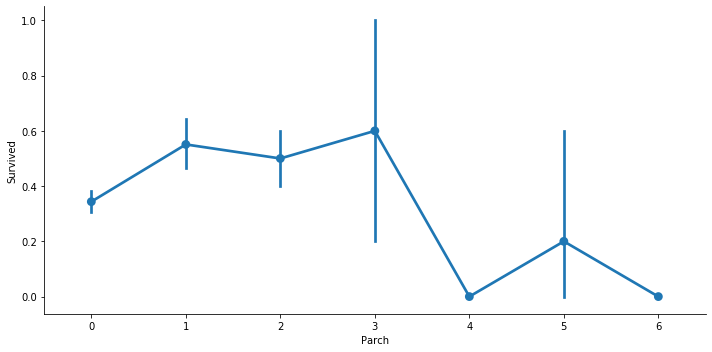

In [168]:
for col in ['SibSp','Parch']:
    sns.catplot(x=col,y='Survived',data=titanic_train,kind='point',aspect=2) #vertical line shows the error

* It is found that the people having large family(Parch) and more siblings(Sibsp) were less likely to survive.

**Class as a feature**

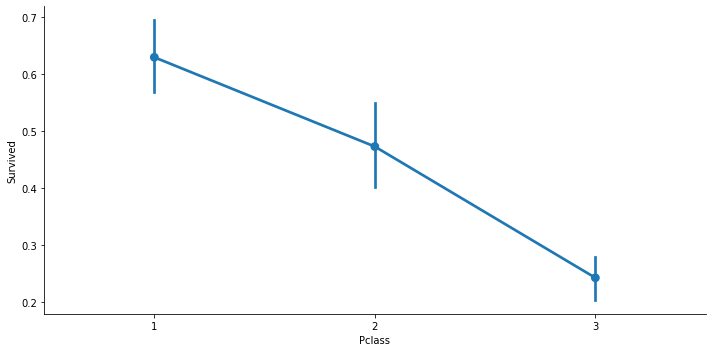

In [169]:
g = sns.catplot(x='Pclass',y='Survived',data=titanic_train,kind='point',aspect=2)

In [170]:
print('Pclass=1 Survived :',titanic_train['Survived'][titanic_train['Pclass']==1].value_counts(normalize=True)[1]*100,'%')
print('Pclass=2 Survived :',titanic_train['Survived'][titanic_train['Pclass']==2].value_counts(normalize=True)[1]*100,'%')
print('Pclass=3 Survived :',titanic_train['Survived'][titanic_train['Pclass']==3].value_counts(normalize=True)[1]*100,'%')

Pclass=1 Survived : 62.96296296296296 %
Pclass=2 Survived : 47.28260869565217 %
Pclass=3 Survived : 24.236252545824847 %


**Cabin as a feature**

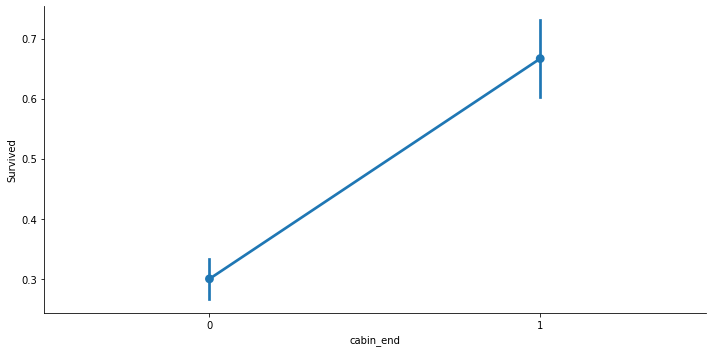

In [171]:
g = sns.catplot(x='cabin_end',y='Survived',data=titanic_train,kind='point',aspect=2)

In [172]:
print('Survived people with assigned cabin     :',
      titanic_train['Survived'][titanic_train['cabin_end']==1].value_counts(normalize=True)[1]*100,'%')
print('Survived people with non-assigned cabin :',
      titanic_train['Survived'][titanic_train['cabin_end']==0].value_counts(normalize=True)[1]*100,'%')

Survived people with assigned cabin     : 66.66666666666666 %
Survived people with non-assigned cabin : 29.985443959243085 %


In [173]:
print('Survived female without assigned cabin :',
      titanic_train['Survived'][(titanic_train['Sex']=='female')&(titanic_train['cabin_end']==0)]
      .value_counts(normalize=True)[1]*100,'%')

Survived female without assigned cabin : 65.43778801843318 %


In [174]:
print('Survived female without assigned cabin and Pclass=3 :',
      titanic_train['Survived'][(titanic_train['Sex']=='female')&(titanic_train['cabin_end']==0)&(titanic_train['Pclass']==3)]
      .value_counts(normalize=True)[1]*100,'%')

Survived female without assigned cabin and Pclass=3 : 49.275362318840585 %


In [175]:
print('Survived male without assigned cabin and Pclass=3 :',
      titanic_train['Survived'][(titanic_train['Sex']=='male')&(titanic_train['cabin_end']==0)&(titanic_train['Pclass']==3)]
      .value_counts(normalize=True)[1]*100,'%')

Survived male without assigned cabin and Pclass=3 : 13.196480938416421 %


**Embarked as a feature**

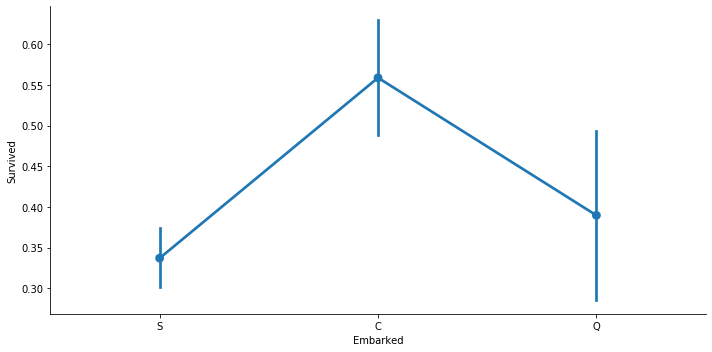

In [176]:
g = sns.catplot(x='Embarked',y='Survived',data=titanic_train,kind='point',aspect=2)

In [177]:
print('Survived people with Embarked S :',
      titanic_train['Survived'][titanic_train['Embarked']=='S'].value_counts(normalize=True)[1]*100,'%')
print('Survived people with Embarked C :',
      titanic_train['Survived'][titanic_train['Embarked']=='C'].value_counts(normalize=True)[1]*100,'%')
print('Survived people with Embarked Q :',
      titanic_train['Survived'][titanic_train['Embarked']=='Q'].value_counts(normalize=True)[1]*100,'%')

Survived people with Embarked S : 33.69565217391305 %
Survived people with Embarked C : 55.88235294117647 %
Survived people with Embarked Q : 38.961038961038966 %


In [178]:
print('Survived people with Embarked C and Pclass=1 :',
      titanic_train['Survived'][(titanic_train['Embarked']=='C')&(titanic_train['Pclass']==1)]
      .value_counts(normalize=True)[1]*100,'%')

Survived people with Embarked C and Pclass=1 : 70.11494252873564 %


# Cleaning remaining data for model evaluation

In [179]:
titanic_train.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_end,Floor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Z
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Z
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Z
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,Z
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,E


* Sex

In [0]:
titanic_train['Sex']=np.where(titanic_train['Sex']=='male',0,1) 
titanic_test['Sex']=np.where(titanic_test['Sex']=='male',0,1)

* Embarked

In [0]:
Embarked_map = {"S": 1, "C": 2, "Q": 3}
titanic_train['Embarked'] = titanic_train['Embarked'].map(Embarked_map)
titanic_test['Embarked'] = titanic_test['Embarked'].map(Embarked_map)

In [182]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Floor            0
dtype: int64

* Categorial features into numeric feature : Floor

In [0]:
from sklearn.preprocessing import LabelEncoder
labelEnc=LabelEncoder()
titanic_train['Floor']=labelEnc.fit_transform(titanic_train['Floor'])
titanic_test['Floor']=labelEnc.fit_transform(titanic_test['Floor'])

* Title

In [184]:
complete_dataset = [titanic_train, titanic_test]
for i in complete_dataset:
    i['Title']=i.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(titanic_train['Title'], titanic_train['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [0]:
titanic_train['Title'] = titanic_train['Title'].replace(['Col','Don', 'Lady','Rev',
                                                         'Jonkheer', 'Capt', 'Dr','Countess','Sir', 'Major',  'Dona'], 'Few')
titanic_train['Title'] = titanic_train['Title'].replace(['Mlle','Ms'], 'Miss')
titanic_train['Title'] = titanic_train['Title'].replace('Mme', 'Mrs')

titanic_test['Title']  = titanic_test['Title'].replace(['Col','Don', 'Lady','Rev',
                                                         'Jonkheer', 'Capt', 'Dr','Countess','Sir', 'Major',  'Dona'], 'Few')
titanic_test['Title']  = titanic_test['Title'].replace(['Mlle','Ms'], 'Miss')
titanic_test['Title']  = titanic_test['Title'].replace('Mme', 'Mrs')

In [0]:
titanic_train['Title'] = labelEnc.fit_transform(titanic_train['Title'])
titanic_test['Title']  = labelEnc.fit_transform(titanic_test['Title'])

In [187]:
titanic_train['Title'].value_counts()

3    517
2    185
4    126
1     40
0     23
Name: Title, dtype: int64

* Drop extra features

In [0]:
drop_things=['PassengerId','Name','Ticket','Cabin']
titanic_train.drop(drop_things,axis=1,inplace=True)
titanic_test.drop(drop_things,axis=1,inplace=True)

In [189]:
titanic_train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_end,Floor,Title
0,0,3,0,22.0,1,0,7.2500,1,0,8,3
1,1,1,1,38.0,1,0,71.2833,2,1,2,4
2,1,3,1,26.0,0,0,7.9250,1,0,8,2
3,1,1,1,35.0,1,0,53.1000,1,1,2,4
4,0,3,0,35.0,0,0,8.0500,1,0,8,3
5,0,3,0,NaN,0,0,8.4583,3,0,8,3
6,0,1,0,54.0,0,0,51.8625,1,1,4,3
7,0,3,0,2.0,3,1,21.0750,1,0,8,1
8,1,3,1,27.0,0,2,11.1333,1,0,8,4
9,1,2,1,14.0,1,0,30.0708,2,0,8,4


In [190]:
titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Floor,Title
0,3,0,34.5,0,0,7.8292,3,8,3
1,3,1,47.0,1,0,7.0000,1,2,4
2,2,0,62.0,0,0,9.6875,3,8,3
3,3,0,27.0,0,0,8.6625,1,2,3
4,3,1,22.0,1,1,12.2875,1,8,4


* Only Age feature is remaining left with discontinous values
* Filling missing Age with average value is not a good practice always
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [0]:
from sklearn.ensemble import RandomForestRegressor
for dataset in [titanic_train,titanic_test]:
    train_missing_age_df = dataset.loc[(dataset['Age'].notnull())]
    test_missing_age_df  = dataset.loc[(dataset['Age'].isnull())]
    cols = ['Age']  + [col for col in dataset.columns if col != 'Age'] #Transferring Age from index 3 to index 0
    train_missing_age_df = train_missing_age_df[cols]
    test_missing_age_df  = test_missing_age_df[cols]
    X = train_missing_age_df.values[:,1::]
    Y = train_missing_age_df.values[:,0]
    rtr = RandomForestRegressor(n_estimators=2500,n_jobs=-1)
    rtr.fit(X,Y)
    age_predicted = rtr.predict(test_missing_age_df.values[:,1::])
    dataset.loc[(dataset['Age'].isnull()),'Age'] = age_predicted

In [192]:
titanic_train.head(6)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_end,Floor,Title
0,0,3,0,22.000000,1,0,7.2500,1,0,8,3
1,1,1,1,38.000000,1,0,71.2833,2,1,2,4
2,1,3,1,26.000000,0,0,7.9250,1,0,8,2
3,1,1,1,35.000000,1,0,53.1000,1,1,2,4
4,0,3,0,35.000000,0,0,8.0500,1,0,8,3
5,0,3,0,41.828761,0,0,8.4583,3,0,8,3


## Survival Prediction using different models

In [0]:
from sklearn.model_selection import train_test_split
features = titanic_train.drop('Survived',axis=1)              
labels = titanic_train['Survived']
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,random_state = 10)

### 1. LinearRegression

In [0]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)
Y_lr = lm.predict(x_test)

In [195]:
lm.intercept_

0.4948309272075619

In [196]:
lm.coef_

array([-1.64525767e-01,  4.82493177e-01, -6.43347697e-03, -5.81747687e-02,
       -2.13104579e-02,  2.10212109e-04,  5.98263513e-02,  2.44110066e-01,
        3.00153093e-02, -4.11477958e-03])

In [0]:
Yhat_lr = np.where(Y_lr>0.5,1,0)

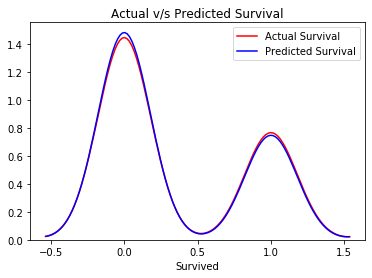

In [198]:
sns.distplot(y_test,hist=False,color='r',label='Actual Survival')
plt.title('Actual v/s Predicted Survival')
sns.distplot(Yhat_lr,hist=False,color='b',label='Predicted Survival')

In [199]:
accuracy = sum(y_test==Yhat_lr)*100/len(y_test)
accuracy

83.24022346368714

In [200]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
accuracy_lr  = round(accuracy_score(y_test,Yhat_lr),3)
precision_lr = round(precision_score(y_test,Yhat_lr),3)
recall_lr    = round(recall_score(y_test,Yhat_lr),3)
print("Accuracy  : {}% \nPrecision : {}% \nRecall    : {}% ".format(accuracy_lr*100,precision_lr*100,recall_lr*100))

Accuracy  : 83.2% 
Precision : 76.7% 
Recall    : 74.2% 


## 2. LogisticRegression

In [0]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(x_train,y_train)
Yhat_lgr = lgr.predict(x_test)

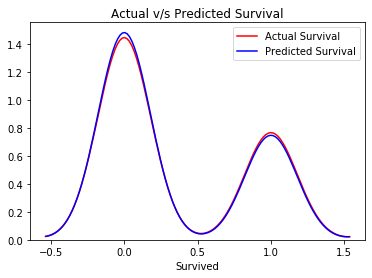

In [202]:
sns.distplot(y_test,hist=False,color='r',label='Actual Survival')
plt.title('Actual v/s Predicted Survival')
sns.distplot(Yhat_lgr,hist=False,color='b',label='Predicted Survival')

In [203]:
accuracy_lgr = round(accuracy_score(y_test,Yhat_lgr),3)
precision_lgr = round(precision_score(y_test,Yhat_lgr),3)
recall_lgr = round(recall_score(y_test,Yhat_lgr),3)
print("Accuracy  : {}% \nPrecision : {}% \nRecall    : {}% ".format(accuracy_lgr*100,precision_lgr*100,recall_lgr*100))

Accuracy  : 83.2% 
Precision : 76.7% 
Recall    : 74.2% 


## 3. GaussianNB

In [0]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(x_train,y_train)
Yhat_GNB = GNB.predict(x_test)

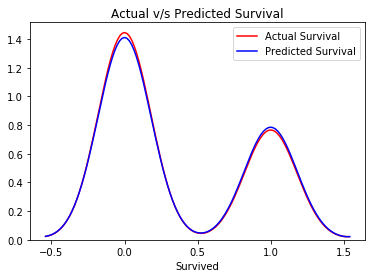

In [205]:
sns.distplot(y_test,hist=False,color='r',label='Actual Survival')
plt.title('Actual v/s Predicted Survival')
sns.distplot(Yhat_GNB,hist=False,color='b',label='Predicted Survival')

In [206]:
accuracy_GNB  = round(accuracy_score(y_test,Yhat_GNB),3)
precision_GNB = round(precision_score(y_test,Yhat_GNB),2)
recall_GNB    = round(recall_score(y_test,Yhat_GNB),3)
print("Accuracy  : {}% \nPrecision : {}% \nRecall    : {}% ".format(accuracy_GNB*100,precision_GNB*100,recall_GNB*100))

Accuracy  : 81.0% 
Precision : 72.0% 
Recall    : 74.2% 


## 4. SupportVectorMachine-SVC

In [0]:
from sklearn.svm import SVC
SVC = SVC()
SVC.fit(x_train,y_train)
Yhat_SVC = SVC.predict(x_test)

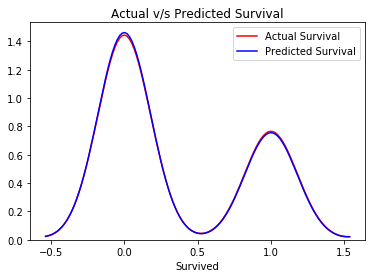

In [208]:
sns.distplot(y_test,hist=False,color='r',label='Actual Survival')
plt.title('Actual v/s Predicted Survival')
sns.distplot(Yhat_SVC,hist=False,color='b',label='Predicted Survival')

In [209]:
accuracy_SVC = round(accuracy_score(y_test,Yhat_SVC),3)
precision_SVC = round(precision_score(y_test,Yhat_SVC),3)
recall_SVC = round(recall_score(y_test,Yhat_SVC),3)
print("Accuracy  : {}% \nPrecision : {}% \nRecall    : {}% ".format(accuracy_SVC*100,precision_SVC*100,recall_SVC*100))

Accuracy  : 73.7% 
Precision : 62.3% 
Recall    : 61.3% 


## 5. SupportVectorMachine-LSVC

In [0]:
from sklearn.svm import LinearSVC
LSVC = LinearSVC(max_iter=10000)
LSVC.fit(x_train,y_train)
Yhat_LSVC = LSVC.predict(x_test)

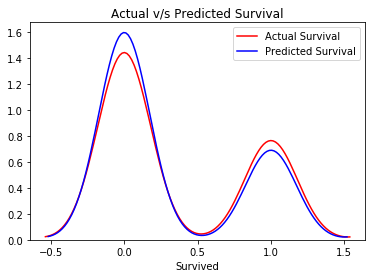

In [211]:
sns.distplot(y_test,hist=False,color='r',label='Actual Survival')
plt.title('Actual v/s Predicted Survival')
sns.distplot(Yhat_LSVC,hist=False,color='b',label='Predicted Survival')

In [212]:
accuracy_LSVC = round(accuracy_score(y_test,Yhat_LSVC),3)
precision_LSVC = round(precision_score(y_test,Yhat_LSVC),3)
recall_LSVC = round(recall_score(y_test,Yhat_LSVC),3)
print("Accuracy  : {}% \nPrecision : {}% \nRecall    : {}% ".format(accuracy_LSVC*100,precision_LSVC*100,recall_LSVC*100))

Accuracy  : 79.9% 
Precision : 74.1% 
Recall    : 64.5% 


## 6. StochasticGradientDescent-SGDClassifier

In [0]:
from sklearn.linear_model import SGDClassifier
SGDC = SGDClassifier()
SGDC.fit(x_train,y_train)
Yhat_SGDC = SGDC.predict(x_test)

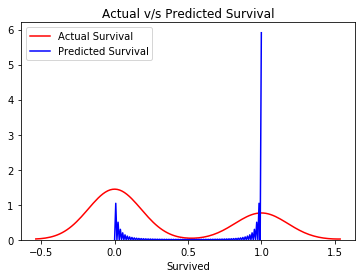

In [214]:
sns.distplot(y_test,hist=False,color='r',label='Actual Survival')
plt.title('Actual v/s Predicted Survival')
sns.distplot(Yhat_SGDC,hist=False,color='b',label='Predicted Survival')

In [215]:
accuracy_SGDC = round(accuracy_score(y_test,Yhat_SGDC),3)
precision_SGDC = round(precision_score(y_test,Yhat_SGDC),3)
recall_SGDC = round(recall_score(y_test,Yhat_SGDC),3)
print("Accuracy  : {}% \nPrecision : {}% \nRecall    : {}% ".format(accuracy_SGDC*100,precision_SGDC*100,recall_SGDC*100))

Accuracy  : 67.0% 
Precision : 80.0% 
Recall    : 6.5% 


## 7. Perceptron

In [0]:
from sklearn.linear_model import Perceptron
pn = Perceptron()
pn.fit(x_train,y_train)
Yhat_pn = pn.predict(x_test)

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



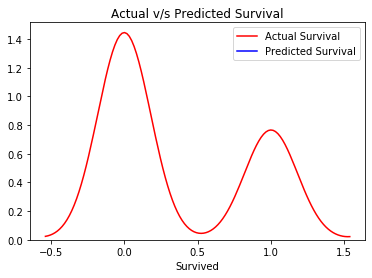

In [217]:
sns.distplot(y_test,hist=False,color='r',label='Actual Survival')
plt.title('Actual v/s Predicted Survival')
sns.distplot(Yhat_pn,hist=False,color='b',label='Predicted Survival')

In [218]:
accuracy_pn  = round(accuracy_score(y_test,Yhat_pn),3)
precision_pn = round(precision_score(y_test,Yhat_pn),3)
recall_pn    = round(recall_score(y_test,Yhat_pn),3)
print("Accuracy  : {}% \nPrecision : {}% \nRecall    : {}% ".format(accuracy_pn*100,precision_pn*100,recall_pn*100))

Accuracy  : 65.4% 
Precision : 0.0% 
Recall    : 0.0% 


## 8. RandomForestClassifier

In [219]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier()
cross_val_score(rf,x_train,y_train,cv=5)

array([0.83216783, 0.83216783, 0.75352113, 0.83802817, 0.78169014])

To find the optimal hyperparameter,we'll use grid search

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
def print_result(results):
    print('BEST PARAMS {}'.format(results.best_params_))
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean,std,params in zip(means,stds,results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean,2),round(std*2,2),params))

In [222]:
parameter={'n_estimators':[5,50,100],
           'max_depth':[2,10,20,None]}                  # How many random forest do you want to build(n_estimators)
cv = GridSearchCV(rf,parameter,cv=5)                    # 3(n_estimators)*4(max_depth)*5(cv) = 60 models
cv.fit(x_train,y_train.values.ravel())
print_result(cv)

BEST PARAMS {'max_depth': 10, 'n_estimators': 100}
0.77 (+/-0.07) for {'max_depth': 2, 'n_estimators': 5}
0.79 (+/-0.02) for {'max_depth': 2, 'n_estimators': 50}
0.78 (+/-0.04) for {'max_depth': 2, 'n_estimators': 100}
0.79 (+/-0.04) for {'max_depth': 10, 'n_estimators': 5}
0.82 (+/-0.07) for {'max_depth': 10, 'n_estimators': 50}
0.83 (+/-0.07) for {'max_depth': 10, 'n_estimators': 100}
0.8 (+/-0.07) for {'max_depth': 20, 'n_estimators': 5}
0.81 (+/-0.06) for {'max_depth': 20, 'n_estimators': 50}
0.81 (+/-0.06) for {'max_depth': 20, 'n_estimators': 100}
0.78 (+/-0.07) for {'max_depth': None, 'n_estimators': 5}
0.81 (+/-0.04) for {'max_depth': None, 'n_estimators': 50}
0.81 (+/-0.06) for {'max_depth': None, 'n_estimators': 100}


In [223]:
rf1 = RandomForestClassifier(n_estimators=100,max_depth=10)
rf1.fit(x_train,y_train.values.ravel())
rf2 = RandomForestClassifier(n_estimators=50,max_depth=10)
rf2.fit(x_train,y_train.values.ravel())
rf3 = RandomForestClassifier(n_estimators=50,max_depth=20)
rf3.fit(x_train,y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [224]:
for model in [rf1,rf2,rf3]:
    Yhat = model.predict(x_test)
    accuracy = round(accuracy_score(y_test,Yhat),3)
    precision = round(precision_score(y_test,Yhat),3)
    recall = round(recall_score(y_test,Yhat),3)
    print("max_depth : {} , n_estimators : {}, A:{} , P:{} , R:{} "
          .format(model.max_depth,model.n_estimators,accuracy,precision,recall))

max_depth : 10 , n_estimators : 100, A:0.849 , P:0.787 , R:0.774 
max_depth : 10 , n_estimators : 50, A:0.855 , P:0.79 , R:0.79 
max_depth : 20 , n_estimators : 50, A:0.838 , P:0.754 , R:0.79 


model rf1 and rf3 has more accuracy

In [0]:
Yhat_rf = rf1.predict(x_test)

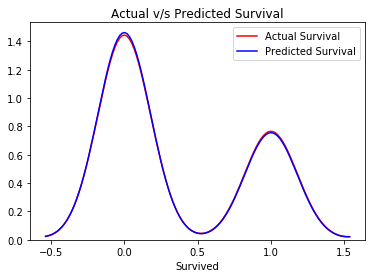

In [226]:
sns.distplot(y_test,hist=False,color='r',label='Actual Survival')
plt.title('Actual v/s Predicted Survival')
sns.distplot(Yhat_rf,hist=False,color='b',label='Predicted Survival')

In [227]:
accuracy_rf  = round(accuracy_score(y_test,Yhat_rf),3)
precision_rf = round(precision_score(y_test,Yhat_rf),3)
recall_rf    = round(recall_score(y_test,Yhat_rf),3)
print("max_depth : {}  \nn_estimators : {}\nAccuracy  : {}% \nPrecision : {}% \nRecall    : {}% "
      .format(rf1.max_depth,rf1.n_estimators,accuracy_rf*100,precision_rf*100,recall_rf*100))

max_depth : 10  
n_estimators : 100
Accuracy  : 84.89999999999999% 
Precision : 78.7% 
Recall    : 77.4% 


## 9. DecisionTreeClassifier

In [0]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)
Yhat_DTC = DTC.predict(x_test)

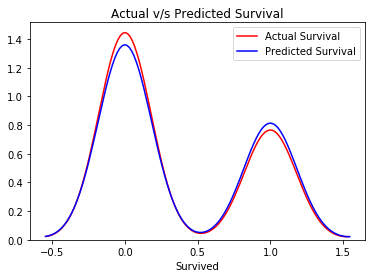

In [229]:
sns.distplot(y_test,hist=False,color='r',label='Actual Survival')
plt.title('Actual v/s Predicted Survival')
sns.distplot(Yhat_DTC,hist=False,color='b',label='Predicted Survival')

In [230]:
accuracy_DTC  = round(accuracy_score(y_test,Yhat_DTC),3)
precision_DTC = round(precision_score(y_test,Yhat_DTC),3)
recall_DTC    = round(recall_score(y_test,Yhat_DTC),3)
print("Accuracy  : {}% \nPrecision : {}% \nRecall    : {}% ".format(accuracy_DTC*100,precision_DTC*100,recall_DTC*100))

Accuracy  : 80.4% 
Precision : 70.1% 
Recall    : 75.8% 


## 10. GradientBoostingClassifier

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)
Yhat_GBC = GBC.predict(x_test)

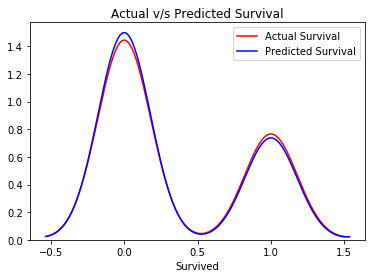

In [232]:
sns.distplot(y_test,hist=False,color='r',label='Actual Survival')
plt.title('Actual v/s Predicted Survival')
sns.distplot(Yhat_GBC,hist=False,color='b',label='Predicted Survival')

In [233]:
accuracy_GBC  = round(accuracy_score(y_test,Yhat_GBC),3)
precision_GBC = round(precision_score(y_test,Yhat_GBC),3)
recall_GBC    = round(recall_score(y_test,Yhat_GBC),3)
print("Accuracy  : {}% \nPrecision : {}% \nRecall    : {}% ".format(accuracy_GBC*100,precision_GBC*100,recall_GBC*100))

Accuracy  : 84.89999999999999% 
Precision : 79.7% 
Recall    : 75.8% 


## 11. KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)
Yhat_KNN = KNN.predict(x_test)

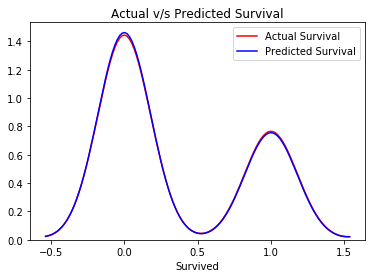

In [235]:
sns.distplot(y_test,hist=False,color='r',label='Actual Survival')
plt.title('Actual v/s Predicted Survival')
sns.distplot(Yhat_KNN,hist=False,color='b',label='Predicted Survival')

In [236]:
accuracy_KNN  = round(accuracy_score(y_test,Yhat_KNN),3)
precision_KNN = round(precision_score(y_test,Yhat_KNN),3)
recall_KNN    = round(recall_score(y_test,Yhat_KNN),3)
print("Accuracy  : {}% \nPrecision : {}% \nRecall    : {}% ".format(accuracy_KNN*100,precision_KNN*100,recall_KNN*100))

Accuracy  : 73.7% 
Precision : 62.3% 
Recall    : 61.3% 


In [237]:
prediction = pd.DataFrame({'Models':['LinearRegression','LogisticRegression','GaussianNB','SupportVectorMachine-SVC','SupportVectorMachine-LSVC',
           'StochasticGradientDescent-SGDClassifier','Perceptron','RandomForestClassifier','DecisionTreeClassifier',
           'GradientBoostingClassifier','KNN'],
 
 'Accuracy_Score':[accuracy_lr,accuracy_lgr,accuracy_GNB,accuracy_SVC,accuracy_LSVC,accuracy_SGDC,accuracy_pn,accuracy_rf,
                   accuracy_DTC,accuracy_GBC,accuracy_KNN],
 
 
 'Precision_Score':[precision_lr,precision_lgr,precision_GNB,precision_SVC,precision_LSVC,precision_SGDC,precision_pn,
                    precision_rf,precision_DTC,precision_GBC,precision_KNN],
 
 
 'Recall_Score':[recall_lr,recall_lgr,recall_GNB,recall_SVC,recall_LSVC,recall_SGDC,recall_pn,recall_rf,recall_DTC,recall_GBC,
                 recall_KNN]})
prediction.sort_values(by='Accuracy_Score', ascending=False)

,Models,Accuracy_Score,Precision_Score,Recall_Score
7,RandomForestClassifier,0.849,0.787,0.774
9,GradientBoostingClassifier,0.849,0.797,0.758
0,LinearRegression,0.832,0.767,0.742
1,LogisticRegression,0.832,0.767,0.742
2,GaussianNB,0.810,0.720,0.742
8,DecisionTreeClassifier,0.804,0.701,0.758
4,SupportVectorMachine-LSVC,0.799,0.741,0.645
3,SupportVectorMachine-SVC,0.737,0.623,0.613
10,KNN,0.737,0.623,0.613
5,StochasticGradientDescent-SGDClassifier,0.670,0.800,0.065


In [238]:
import plotly.graph_objects as go


fig = go.Figure()
fig.add_trace(go.Bar(x=prediction['Models'], y=prediction['Accuracy_Score']*100,
                base=0,
                marker_color='crimson',
                name='Accuracy'))
fig.add_trace(go.Bar(x=prediction['Models'], y=prediction['Precision_Score']*100,
                base=0,
                marker_color='lightslategrey',
                name='Precision'
                ))
fig.add_trace(go.Bar(x=prediction['Models'], y=prediction['Recall_Score']*100,
                base=0,
                marker_color='darkmagenta',
                name='Recall'
                ))

fig.show()